# Do changes bring difference: A comparative study of Manchester United’s performance after sacking Jose Mourinho

Angie Liang, Sam Zhang, Zizhen Guo

> Todos
> - [ ] One more reference from scientific paper

## Introduction
Jose Mourinho, the controversial “special one” was sacked by Manchester United by December 18, 2018 ([BBC](https://www.bbc.com/sport/football/46603018)). The Portuguese manager joined the England Premier League solikccer club in May 2016, and took the charge for more than 2 years. Jose is broadly recognized as one of the greatest all-time soccer managers ([ESPN, 2013](https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/)).

<img src="intro.assets/jose.jpg" alt="jose" style="zoom:50%;" />

### Purpose
Our goal in this study is to quantitatively evaluate the effectiveness of Manchester United sacking Jose Mourinho. In other word, whether or not such a decision significantly improves the United’ performance in Premier League. The goal difference in each match will be investigated as a simplified process of the ELO system (Hvattum & Arntzen, 2009).

### Dataset
We procecced with the [Premier League results dataset](https://www.football-data.co.uk/englandm.php). After wrangling in the **Preliminary Results** section, our dataset `league_results` record Manchester United’ goal differences in 76 matches over season 2016/17 and 2017/18 coached by Jose Mourinho (`coach == 'old`), and 76 matches in season 19/20 and 20/21 coached by Ole Gunnar Solskjær (`coach == 'new'`), who replaced Jose’s position in December, 2018. 

### Sampling and hypothesis testing
We will construct a null model with bootstrap sampling method, and conduct hypothesis tests with significance level $\alpha=0.05$ on both the means as the location parameter and standard deviations as the scale parameter. 
#### Testing on means
The mean value represents the averaged-out difference in goals of one manager. We assume $\mu_m$ is the mean of goal difference for Manchester United under Jose Mourinho’s leadership, and $\mu_s$ represents the mean goal difference as Ole Gunnar Solskjær took his position.

- Null hypothesis $H_0:\mu_s=\mu_m$
- Alternative hypothesis $H_A:\mu_s>\mu_m$

#### Testing on standard deviations
The standard deviation evaluates the variation of goal difference, or the stability of the team. We want to compare the standard deviation of goal difference along matches between the original coach $\sigma_m$ and the new coach $\sigma_s$.
- Null hypothesis $H_0:\sigma_s=\sigma_m$
- Alternative hypothesis $H_A:\sigma_s<\sigma_m$

## Preliminary Results

In [12]:
# loading required packeges
library(tidyverse)
library(repr)
library(digest)
library(infer)
require(gridExtra)
library(cowplot)

# suppress warnings
options(warn=-1)

Loading required package: gridExtra


### Import raw data from [football-data.co.uk](https://www.football-data.co.uk/englandm.php) and wrangle the format

In [2]:
league_20_21 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/2021/E0.csv') %>% 
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_19_20 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1920/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

league_17_18 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1718/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_16_17 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1617/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

old_coach <- rbind(league_16_17, league_17_18) %>% mutate(coach = 'old') 
new_coach <- rbind(league_19_20, league_20_21) %>% mutate(coach = 'new')

league_results <- rbind(old_coach, new_coach)
head(league_results)

goal_diff,coach
2,old
2,old
1,old
-1,old
-2,old
3,old


### Parameters and sample distribution

In [29]:
obs_stat <- league_results %>%
    group_by(coach) %>%
    summarize(mean = mean(goal_diff), 
             sd = sd(goal_diff))

obs_stat

obs_diff_mean <- obs_stat$mean[1] - obs_stat$mean[2]
obs_diff_mean

obs_sd_sd <- obs_diff_mean <- obs_stat$sd[1] - obs_stat$sd[2]
obs_sd_mean

coach,mean,sd
new,0.7763158,1.915541
old,0.8552632,1.537998


[1] -0.07894737

[1] 0.377543

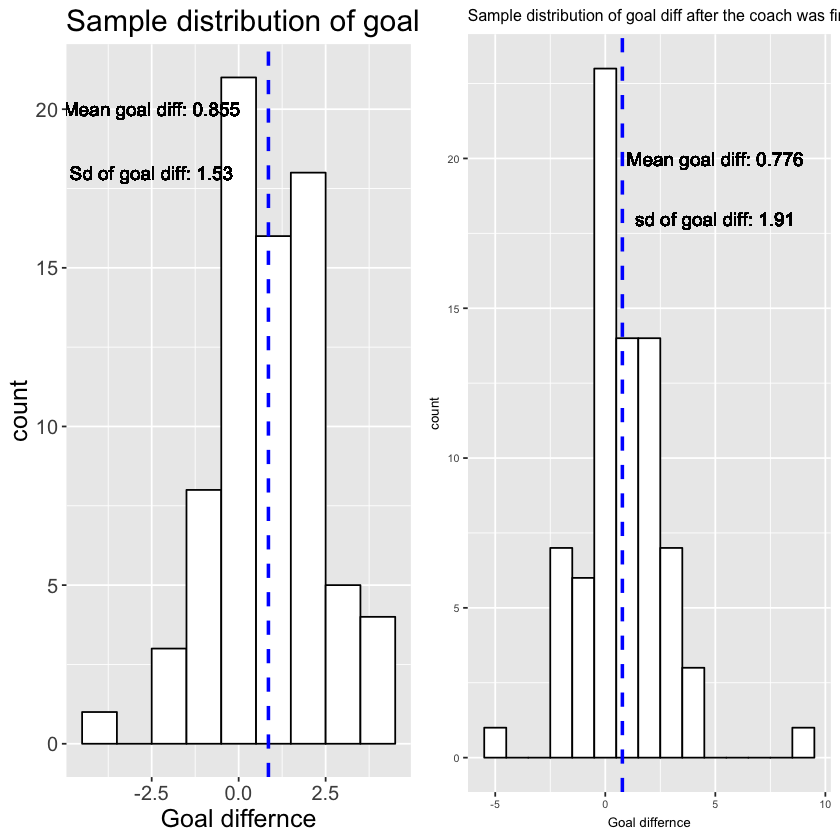

In [30]:
# <------- sample distribution with the old coach ----------------

goal_diff_before_fired_sample_distribution <- old_coach %>%   
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = -2.5, y = 20, label = "Mean goal diff: 0.855", size = 4) +
geom_text(x = -2.5, y = 18, label = "Sd of goal diff: 1.53", size = 4) + 
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff before the coach was fired") +
theme(text = element_text(size = 15))

#---------- Sample distribution with the new coach ----------------

goal_diff_after_fired_sample_distribution <- new_coach %>%  
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = 5, y = 20, label = "Mean goal diff: 0.776", size = 4) +
geom_text(x = 5, y = 18, label = "sd of goal diff: 1.91", size = 4) +
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff after the coach was fired") +
theme(text = element_text(size = 8))

plot_grid(goal_diff_before_fired_sample_distribution, 
             goal_diff_after_fired_sample_distribution)

## References

BBC. (2018). Jose MOURINHO: Manchester UNITED sack manager. BBC Sport. https://www.bbc.com/sport/football/46603018. 

ESPNFC. (2013). Greatest managers, No. 9: Jose Mourinho. https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/. 

Hvattum, L. M., & Arntzen, H. (2009, November 19). Using ELO ratings for match result prediction in association football. International Journal of Forecasting. https://www.sciencedirect.com/science/article/pii/S0169207009001708. 